### imports

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

难点

[Hermite interpolation in Python](https://stackoverflow.com/questions/29724816/hermite-interpolation-in-python) 

[Cubic hermit spline interpolation python](https://stackoverflow.com/questions/36644259/cubic-hermit-spline-interpolation-python)

[recursive hermite](https://stackoverflow.com/questions/40729019/write-a-recursive-function-to-find-hermite-polynomials/67477323#67477323)
1. 打印出函数 返回什么？ 我们做出来的应该是 返回类似`y = a*(x**3) + b*(x**2) + c*x + d ` 这样的计算公式
2. 没有每个点的一阶导数 f'(x)
3. 多段连续函数，需要分开处理
4. 3个点，用hermite和其他的方法有什么不同吗？用hermite产生的阶数会不会很高？


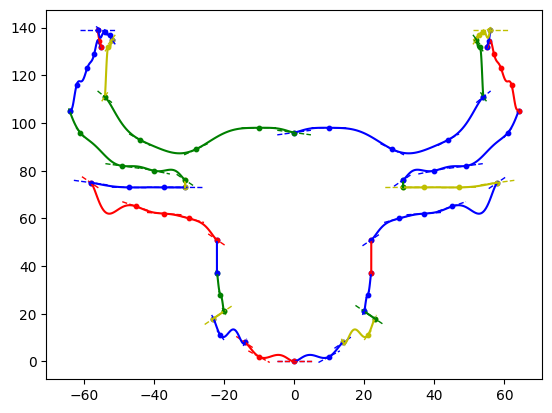

In [164]:
np.set_printoptions(suppress=True) #print float
def hermiteInterpolation(input_list): # [(x0,y0,f'(x0)),(x1,y1,f'(x1)),....]
    input_matrix = np.asarray(input_list)
    X = input_matrix[:,0].repeat(2)
    Y = input_matrix[:,1].repeat(2)
    tangent = input_matrix[:,2]
    n = X.size

    divided_difference_matrix = np.zeros((n,n)) # we will only use the lower triangle
    # first column = Y
    divided_difference_matrix[:,0] = Y
    # second column = mix of tangent + mix of divided difference
    divided_difference_matrix[1::2,1] = tangent
    for row in range(2,n,2):
        divided_difference_matrix[row][1] = (divided_difference_matrix[row][0] - divided_difference_matrix[row-1][0])\
                                             / (X[row]-X[row-1])

    # rest of the column =  divided differences
    
    for col in range(2, n):
        for row in range(col, n):
            divided_difference_matrix[row][col] = (divided_difference_matrix[row][col-1] - divided_difference_matrix[row-1][col-1])\
                                                 / (X[row]-X[row-col])
    
    # print(divided_difference_matrix)


    
    def hermitePolynomial(given_x):
        res = 0
        for k in range(0, n):
            res_mult = 1 # (x − x0) · · · (x − xk)
            for i in range(0, k):
                res_mult *= given_x - X[i]
            res += divided_difference_matrix[k][k] * res_mult
        return res

    return hermitePolynomial



    

def drawSlopeDot(dataList, Color):
    #dot
    plt.scatter(extract(dataList,0),extract(dataList,1), color = Color, marker = "o", s=10 )
    
    #slope
    for i in range(len(dataList)):
        slope = dataList[i][2]
        curPoint = dataList[i][:2]
        slopeLength = 5
        deviate_X = slopeLength / (1+slope**2)
        deviate_Y = deviate_X * slope
        plt.plot([curPoint[0] - deviate_X,curPoint[0] + deviate_X],[curPoint[1] - deviate_Y, curPoint[1] +  deviate_Y],\
                    color = Color, linestyle = "--", linewidth = 1)

def extract(l,i):
    return [item[i] for item in l]

dataLists = [

#1-3 group1
[
    (0,     0,  0),
    (10,    2,  0.8),
    (14,    8,  1)],
#3-5 group2
[
    (14,    8,  -3),
    (21,    11, 2),
    (23,    18, 3)
],
#5-6 group3
[
    (23,    18, -1),
    (20,    21, -1)
],
#6-8 group4
[
    (20,    21, 3),
    (21,    28, 3),
    (22,    37, 4)
],
#8-9 group5 vertical
[
    (22,    37, 100),	
    (22.01,	51,	100)
],
#9-13 group6
[
	(22,    51, 1),
    (30,    60,	0.4),
    (37,    62, 0.1),
    (45,    65, 0.5),
    (58,    75, 1)
],
#13-16 group7
[
    (58,    75, 0.2),
    (47,    73, 0.02),
    (37,    73, 0.01),
    (31,    73, 0.01)
],
#16-17 group8 vertical
[
    (31,	    76,     100),
    (30.999,	73,     100)    
],
#17-20 group9
[
    (31,    76,	    1),
    (40,    80,     0.3), #added data
    (49,    82,     0.2),
    (61,    96,     1.8),
    (64,    105,    4)
],
#20-23 group10
[
    (64,    105,	-6),
    (62,    116,    -5),
    (59,    123,	-4),
    (57,    129,    -6), #added data
    (55,    132,	-8)
],
#23-25 group11
[
    (55,    132,    5),
    (55.5,  134.4,  6),	
    (56,    139,    8)
],
#25-27 group12
[
    (56,	139,	0),
    (54,    138,    1), #added data
    (52.6,	137,    1.5),
    (52,	135,	2)
],
#27-29 group13
[
    (52,    135,    -2),
    (53,    132,    -2.1),
    (54,    111,    -2.2)
],
#29-33 group14
[
    (54,    111,    1.2),
    (44,    93,     0.8),
    (28,    89,	    -0.7),	
    (10,    98,	    -0.01),	
    (0,     96,	    0.2	)
]




]

colorStrList = ['r','b','y','g','b']

colorLoop = 0
for groupID,datalist in enumerate(dataLists):
    colorLoop = (colorLoop + 1) % 5
    colorStr = colorStrList[colorLoop]

    curPoly = hermiteInterpolation(datalist)
    x_space = np.linspace(datalist[0][0],datalist[-1][0],100)
    # plt.plot(extract(datalist,0),extract(datalist,1),marker = "o",color = colorStr)
    drawSlopeDot(datalist, colorStr)
    plt.plot(x_space, curPoly(x_space), color=colorStr)



reversed_DataLists = dataLists.copy()
for datalist in reversed_DataLists:
    for idx, datapoint in enumerate(datalist):
        l = [-datapoint[0],datapoint[1],-datapoint[2]] # x reversed
         # slope reversed
        #  y keep still
        datalist[idx] = tuple(l)

for groupID,dataLists in enumerate(reversed_DataLists):
    datalist = reversed_DataLists[groupID]
    colorLoop = (colorLoop + 1) % 5
    colorStr = colorStrList[colorLoop]

    curPoly = hermiteInterpolation(datalist)
    x_space = np.linspace(datalist[0][0],datalist[-1][0],100)
    # plt.plot(extract(datalist,0),extract(datalist,1),marker = "o",color = colorStr)
    drawSlopeDot(datalist, colorStr)
    plt.plot(x_space, curPoly(x_space), color=colorStr)




plt.show()
    

## overfitting problem 
用Hermite时如果样例点过于稀疏会导致overfitting问题。例如对3个点进行interpolation, 如果使用newton divided difference(图中采用了cubic Hermite interpolation算法来降低次数), 最高次数(degree of Polynomial)为3次, 但是hermite由于在divided difference matrix中插入了一阶导数, 导致整个矩阵row和col都增加了一倍, 最高次数也扩大了一倍(3->6), 在某些情况下所产生的曲线会和预期结果相差较多(见下图)。

一个有效的解决方法是增加样例点的数目，例如我们在x=5增加了一个样例点，利用hermite所产生的曲线就和预期非常符合。

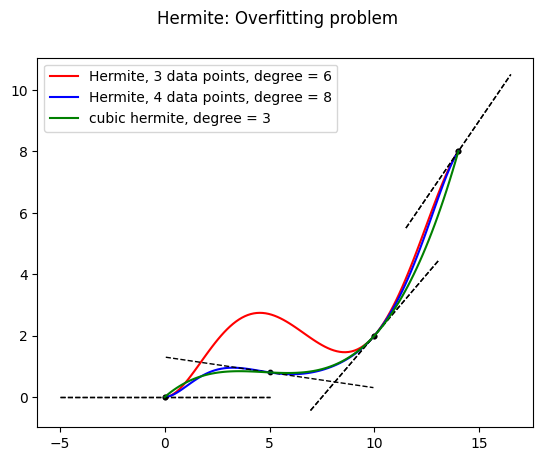

In [165]:
data_3_points = [(0,0,0),(10,2,0.8),(14,8,1)]
data_4_points = [(0,0,0),(5,0.8,-0.1),(10,2,0.8),(14,8,1)]


Poly1 = hermiteInterpolation(data_3_points)
Poly2 = hermiteInterpolation(data_4_points)
x1 = np.linspace(0, 14, 100)

plt.plot(x1, Poly1(x1), color='red',label = "Hermite, 3 data points, degree = 6")
plt.plot(x1, Poly2(x1), color='blue', label = "Hermite, 4 data points, degree = 8")
drawSlopeDot(data_3_points, "black")
drawSlopeDot(data_4_points, "black")




def hermite_scipy_generator(input_list):
    input_matrix = np.asarray(input_list)
    x_points = input_matrix[:,0]
    y_points = input_matrix[:,1]

    def hermite_scipy(x):

        tck = interpolate.splrep(x_points, y_points, k=3)
        return interpolate.splev(x, tck)
    return hermite_scipy




hermite_scipy_4_points = hermite_scipy_generator(data_4_points)

plt.plot(x1, hermite_scipy_4_points(x1), color='g', label="cubic hermite, degree = 3")
plt.suptitle('Hermite: Overfitting problem')
plt.legend()
